# Data Interpretation
* 본 노트북에서는 데이터셋 구축 및 초기 설정을 위한 각종 작업을 진행하고, 데이터셋을 구성하는 변수의 특징을 살펴보는 다양한 방법을 실습합니다.
---

# 1 - 데이터셋 구축 및 설정

## 1.1 - 라이브러리 설치

In [20]:
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install seaborn

     |████████████████████████████████| 285 kB 291 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


## 1.2 - 라이브러리 불러오기

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

---

## 1.3 - 데이터셋 불러오기
* `scikit-learn`에서 제공하는 데이터셋 패키지를 활용하여 붓꽃 데이터셋을 불러옵니다.

In [3]:
data_iris = load_iris()
print(type(data_iris))
data_iris

<class 'sklearn.utils.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 1.4 - 데이터셋 설정
* `scikit-learn`에서 제공하는 기본 붓꽃 데이터셋은 핸들링하기 어려운 부분이 있기 때문에, `pandas`에서 지원하는 `DataFrame`형태로 변경합니다.
* `iris` 데이터셋은 학습 데이터(X)에 해당하는 'data'와 클래스에 해당하는 'target'으로 구분되며, 이를 병합하여 하나의 데이터셋을 구축합니다.

In [4]:
data = pd.DataFrame(data=np.c_[data_iris['data'], data_iris['target']], 
                    columns=data_iris['feature_names'] + ['class'])
data['class'] = data['class'].astype('category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 1.5 - 데이터셋 요약

In [5]:
print('# 변수의 개수 : {}, 데이터 개수 : {}'.format(data.shape[1], data.shape[0]))

numerical = [f for f, t in zip(data.columns, data.dtypes) if t == 'float64']
categorical = [f for f, t in zip(data.columns, data.dtypes) if t != 'float64']
num_class = data['class'].value_counts()

print('\n# 데이터셋 특성 정보')
print(' - 연속형 변수 : {} \n - 범주형 변수 : {}'.format(numerical, categorical))

print('\n# 클래스 정보 \n{}'.format(num_class))

# 변수의 개수 : 5, 데이터 개수 : 150

# 데이터셋 특성 정보
 - 연속형 변수 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 - 범주형 변수 : ['class']

# 클래스 정보 
0.0    50
1.0    50
2.0    50
Name: class, dtype: int64


---

# 2 - 1차원 데이터 살펴보기
* 1차원 데이터의 특징을 살펴보기 위해 평균(Mean), 중앙값(Median), 4분위 범위 등을 알아봅니다.

## 2.1 - 평균(Mean) / 중앙값(Median)
* `평균`은 데이터의 특징을 파악하기 위한 대표적인 방법으로 $E(X)$ 또는 $\bar{X}$와 같이 표현합니다. 데이터 전체의 합을 데이터의 개수로 나누어 산출합니다.
$$\bar{X} = \frac{1}{N}\sum^{N}_{i=1}x_i$$

* `중앙값`은 데이터를 크기 순서로 정렬했을 때, 중앙에 위치하는 값으로 $\tilde{X}$ 혹은 $\hat{X}$와 같이 표현합니다. 중앙값은 데이터의 개수에 따라 산출 방법이 달라집니다.
$$
홀수 \tilde{X} = x_{(\frac{N+1}{2})} \\
짝수 \tilde{X} = \frac{x_{(\frac{N}{2})} + x_{(\frac{N}{2} + 1)}}{2}
$$

In [6]:
for c in numerical:
    mean, median = np.mean(data[c]), np.median(data[c])
    print('# 변수 : {} \t 평균 : {} \t 중앙값 : {}'.format(c, mean, median))

# 변수 : sepal length (cm) 	 평균 : 5.843333333333334 	 중앙값 : 5.8
# 변수 : sepal width (cm) 	 평균 : 3.0573333333333337 	 중앙값 : 3.0
# 변수 : petal length (cm) 	 평균 : 3.7580000000000005 	 중앙값 : 4.35
# 변수 : petal width (cm) 	 평균 : 1.1993333333333336 	 중앙값 : 1.3


# 2.2 - 분산(Variance) / 표준편차(Standard Deviation)
* `분산`은 데이터가 평균으로부터 떨어져 있는 정도를 나타내는 지표이며, $V(X)$ 또는 $\sigma^2$ 처럼 표현하기도 합니다. 데이터셋 $X$를 구성하는 변수 $x_i$에 평균 $\bar{x}$를 뺀 값을 모두 더하여 산출합니다.
$$\sigma^2 = \frac{1}{N}\sum^{N}_{i=1}{(x_i - \bar{x})}^2$$


* `표준편차`는 데이터가 평균을 중심으로 얼마나 퍼져있는지를 나타내는 지표이며, $\sigma$와 같이 표현합니다. 분산과 유사하며 분산에 루트값을 씌운것이 특징입니다.
$$\sigma = \sqrt{\frac{1}{N}\sum^{N}_{i=1}{(x_i - \bar{x})}^2}$$

In [7]:
for c in numerical:
    var, std = np.var(data[c]), np.std(data[c])
    print('# 변수 : {} \t 분산 : {} \t 표준편차 : {}'.format(c, var, std))

# 변수 : sepal length (cm) 	 분산 : 0.6811222222222223 	 표준편차 : 0.8253012917851409
# 변수 : sepal width (cm) 	 분산 : 0.1887128888888889 	 표준편차 : 0.4344109677354946
# 변수 : petal length (cm) 	 분산 : 3.0955026666666665 	 표준편차 : 1.759404065775303
# 변수 : petal width (cm) 	 분산 : 0.5771328888888888 	 표준편차 : 0.7596926279021594


## 2.3 - 사분위 범위(Interquartile Range)
* 사분위 범위는 데이터의 분포를 4개의 구간으로 나누어 살펴보는 방법이다.
* 사분위 범위 중 `Q1`은 하위 25%, `Q3`는 하위 75%에 위치하는 값을 나타내며, `IQR`은 Q3에서 Q1을 뺀 값으로 정의한다

In [8]:
for c in numerical:
    Q1, Q3 = np.percentile(data[c], 25), np.percentile(data[c], 75)
    IQR = Q3 - Q1
    print('# 변수 : {} \t Q1 : {} \t Q2 : {} \t IQR : {}'.format(c, Q1, Q3, IQR))

# 변수 : sepal length (cm) 	 Q1 : 5.1 	 Q2 : 6.4 	 IQR : 1.3000000000000007
# 변수 : sepal width (cm) 	 Q1 : 2.8 	 Q2 : 3.3 	 IQR : 0.5
# 변수 : petal length (cm) 	 Q1 : 1.6 	 Q2 : 5.1 	 IQR : 3.4999999999999996
# 변수 : petal width (cm) 	 Q1 : 0.3 	 Q2 : 1.8 	 IQR : 1.5


## 2.4 - 1차원 데이터 시각화

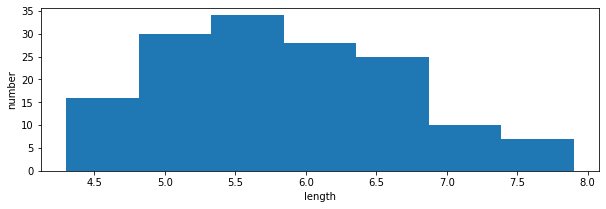

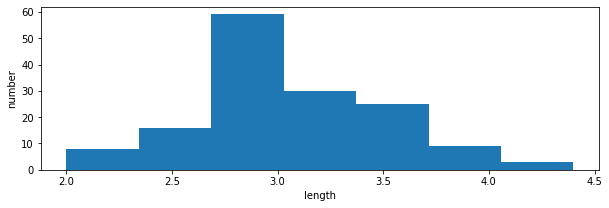

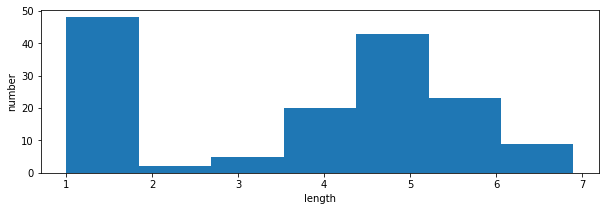

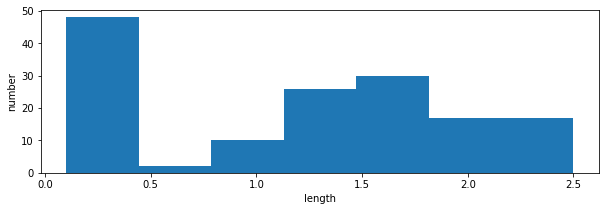

In [9]:
for c in numerical:
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(111)
    freq, _, _ = ax.hist(data[c], bins=7)
    ax.set_xlabel('length')
    ax.set_ylabel('number')
    plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

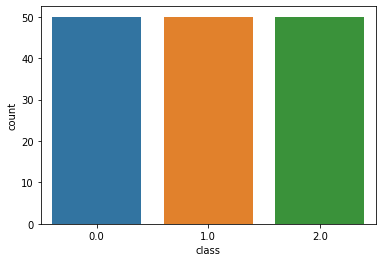

In [23]:
sns.countplot(data['class'])

---

# 3 - 2차원 데이터 살펴보기
* 2차원 데이터는 1차원 데이터에서 적용했던 평균 및 분산과 같은 방법을 사용하여 설명할 수 없다.
* 따라서, 2차원 데이터를 설명하기 위해 `공분산`과 `상관계수`에 대해 알아보고 적용해보고자 한다.

## 3.1 - 공분산(Covariance)

$$ Cov(X, Y) = \frac{\sum^{N}_{i=1}{(x_i - \bar{X})(y_i - \bar{Y})}}{N}$$
* `공분산`은 기존 1차원 데이터를 설명할 때 사용했던 분산과 비슷한 개념을 가지며, 두 개의 분산을 동시에 본다는 개념으로 이해할 수 있다.
* `공분산`을 이용하면 두 개의 변수 사이의 상관정도를 구할 수 있지만, 단위에 영향을 받기 때문에 부정확한 해석의 여지를 남길 수 있다는 한계가 존재한다.
* `sepal length`와 `petal length` 변수로 구성된 `cov_df` 데이터프레임을 구성하여 실습을 진행하고자 한다.

In [44]:
sepal, petal = data['sepal length (cm)'], data['petal length (cm)']

* `numpy`에서 제공하는 `.cov()` 함수를 활용하여 **분산공분산 행렬(variance-covariance matrix)**을 얻을 수 있음
* 행렬의 1행 1열이 첫 번째 인수인 `sepal width`, 2행 2열이 두 번째 인수인 `petal length`에 대응하며, 이를 교차한 나머지 성분이 **공분산**에 해당

In [45]:
cov = np.cov(sepal, petal)
print('공분산 : {}'.format(cov[0, 1]))
cov

공분산 : 1.2743154362416111


array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

* 1행 1열과 2행 2열은 단일 변수로 구성되며, 이는 자연스럽게 각 변수의 분산을 나타냄
* 위의 분산공분산 행렬에서 구한 분산과 일치하는 것을 확인할 수 있음

In [48]:
var_sepal, var_petal = np.var(sepal), np.var(petal)
var_sepal, var_petal

(0.6811222222222223, 3.0955026666666665)

## 3.2 - 상관계수(Correlation Coefficient)
* `상관계수`는 두 변수 사이의 상관을 나타낼 때 사용하는 지표로, 양의 상관관계를 가질수록 1로, 음의 상관관계를 가질수록 -1로 수렴한다.
$$
r_{xy} = \frac{S_{xy}}{S_{x}S_{y}} \\
= \frac{1}{n}\sum^{n}_{i=1}({\frac{x_i - \bar{x}}{S_x}})(\frac{y_i - \bar{y}}{S_y})
$$

* `Pandas`의 `.corr()` 함수를 활용하여 상관계수를 손쉽게 구할 수 있음
* 분산공분산 행렬과 마찬가지로 1행 2열, 2행 1열이 두 변수의 상관계수임을 확인할 수 있음

In [52]:
coco = pd.concat([sepal, petal], axis=1).corr()
coco

,sepal length (cm),petal length (cm)
sepal length (cm),1.000000,0.871754
petal length (cm),0.871754,1.000000


* 꽃잎과 꽃받침 길이는 0.87의 상관관계를 가지며, 이는 상당히 높은 양의 상관관계를 의미한다.
* **꽃잎의 길이가 커질수록 꽃받침의 길이도 커진다**는 것으로 해석할 수 있다.

## 3.3 - 2차원 데이터 시각화
* 1차원 데이터 시각화와 마찬가지로 `matplotlib` 라이브러리를 활용하여 

### 3.3.1 - 산점도(Scatter)
* 2차원 데이터를 표현하는데에는 `산점도`가 효과적이며, 이는 두 변수의 위치를 그래프 상에서 점으로 표현한 것이다.

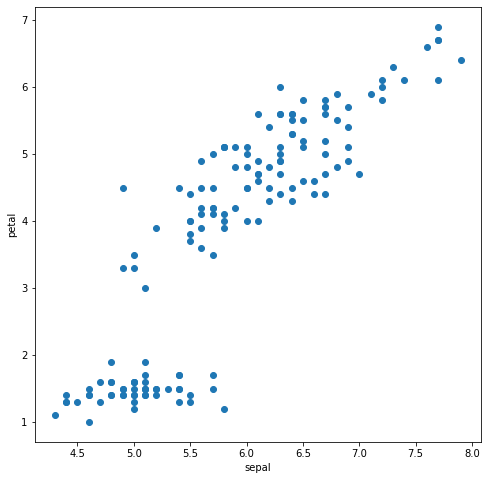

In [53]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(sepal, petal)
ax.set_xlabel('sepal')
ax.set_ylabel('petal')

plt.show()

* 대체로 꽃잎의 크기가 커질수록 꽃받침의 크기도 커지는 것을 알 수 있다.

### 3.3.2 - 회귀직선(Regression Line)
* **회귀직선**은 두 데이터 사이의 관계를 잘 표현하는 직선을 의미
* `Matplotlib`에는 회귀직선을 그리는 함수가 없기에, `numpy`에서 직접 구현
* 회귀직선을 $y$라고 했을 때, 회귀직선 방정식은 아래의 수식과 같음
$$y = \beta_0 + \beta_1{x}$$

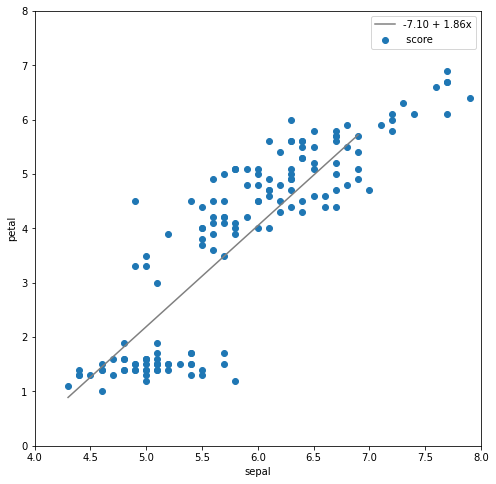

In [60]:
poly_fit = np.polyfit(sepal, petal, 1) # 계수 b0와 b1 산출
poly_1d = np.poly1d(poly_fit) # b0 + b1x를 반환하는 함수 작성
cx = np.linspace(sepal.min(), petal.max()) # x좌표 생성
cy = poly_1d(cx) # y좌표 생성

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(sepal, petal, label = ' score')
ax.plot(cx, cy, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.set_xlabel('sepal')
ax.set_ylabel('petal')
ax.set_ylim(0, 8)
ax.set_xlim(4, 8)
ax.legend(loc='upper right')

plt.show()

* 대체로 $y = x + b$의 형태의 직선을 따르는 그래프가 출력된 것을 확인할 수 있다.

### 3.3.3 - 히트맵(Heat Map)
* **히트맵**은 히스토그램을 2차원으로 표현한 것으로, `hist2d` 함수를 활용

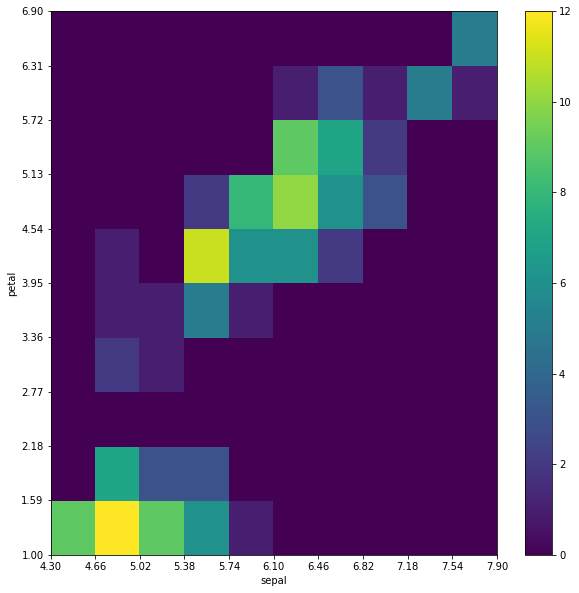

In [77]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

c = ax.hist2d(sepal, petal)

ax.set_xlabel('sepal')
ax.set_ylabel('petal')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()